# Finding Heavy Traffic Indicators on I-94

Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.

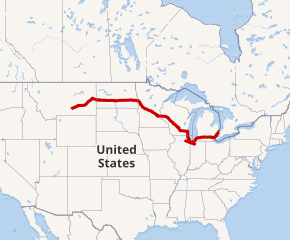

In this project, we are going to analyze the dataset about the westbound traffic on the [I-94 Interstate highway.](https://en.wikipedia.org/wiki/Interstate_94)

The [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

![West bound traffic](https://s3.amazonaws.com/dq-content/524/i94_figma.png)

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. So, we can't generalize our results for the entire I-94 highway.

**The goal of the analysis is to determine the indicators of heavy traffic on I-94.** 

These indicators can be weather type, time of the day, time of the week, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
%matplotlib inline
sns.set()

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


The data dictionary for the columns in the data set are as follows:


| Column              | Description                                                    |
|:---------------------|:---------------------------------------------------------------|
| holiday             | US National holidays plus regional holiday, Minnesota State Fair |
| temp                | Average temperature in Kelvin                                 |
| rain_1h             | Amount in mm of rain that occurred in the hour               |
| snow_1h             | Amount in mm of snow that occurred in the hour               |
| clouds_all          | Percentage of cloud cover                                     |
| weather_main        | Short textual description of the current weather             |
| weather_description | Longer textual description of the current weather            |
| date_time           | Hour of the data collected in local CST time                 |
| traffic_volume      | Hourly I-94 ATR 301 reported westbound traffic volume        |

In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are no missing values for any of the columns in the dataset. So, no need to drop any columns. Before going on to the exploratory data analyis. Let's convert the `date_time` column to a date time data type. Just in case, if we need to work with the time values.

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


# Exploratory Data Analysis

We'll begin exploring the data by looking at the `traffic_volume` column which tells us the amount of traffic for each hour and each day.

Let's begin by looking up some summary statistics for the above column.

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

So, there are days when there is no amount of traffic(?) volume on the highway. It makes sense, because, the vehicle movement in highways is always smooth. Unless, there's some road issues or trees fallen or some other mishaps, which are rare will lead to more traffic volume on the highways.

* About **25%** of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* The maximum traffic volume is **7280.** 
* **75%** of the traffic volume is less than 4933, so the occurence of maximum traffic volume should be very less.

We need to remember that the data points collected is for each hour, everyday. So, the traffic volume will be high at some point of time in the day, on some days. Also, the data collected can't be generalised for the whole highway, like we mentioned in the introduction.

Let's have a look at how the traffic volume is distributed by plotting a histogram which will show the frequency of the traffic volume.

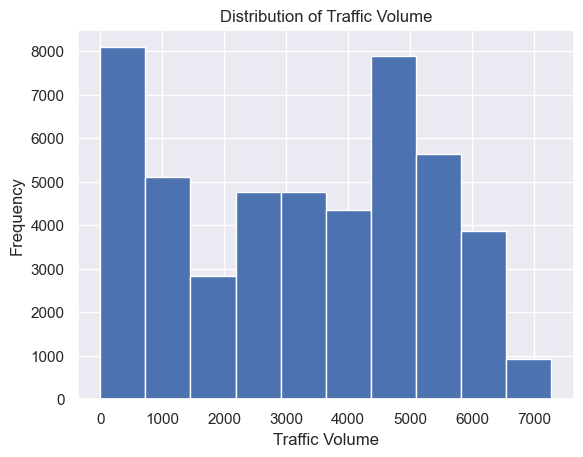

In [8]:
traffic['traffic_volume'].plot.hist()
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.show()

* Like we predicted, the days when the traffic volume is less (0-500) is significantly less. Almost above 8,000.
* The days when the traffic volume goes over 6500 is very less. The frequency is 1000.
* Majority of the traffic volume falls between the ranges of 2500-5500.

But, what causes the traffic volume to change on highways? Does the traffic volume increase on public days? Do the daytime and nightime ifluence the traffic volume? Let's have a look at the latter, first.

# Traffic Volume: Day vs Night

The possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the datasets into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point for comparing.

In [9]:
traffic['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

In [10]:
#isolate the daytime data
#taking less than 19 because we need data up until 18:59, greater and including 19:00 will be nighttime.
daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)] 

daytime['date_time'].dt.hour.value_counts().sort_index()

7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
Name: date_time, dtype: int64

In [11]:
#isolate the nightime data
nighttime = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]

nighttime['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

Now we've segregated the data based on their timings, let's come back to answering our question of how nighttime and daytime influence the traffic volume.

We'll plot a histogram showing the frequency of the traffic volume for both, night and day. Let's look up for few summary statistics for both, first.

In [12]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking at the two summary statistics above, we can make a few interesting observations.

* The nighttime traffic volume has 75% values which are less than 2819, when compared to the daytime which is almost double - 5559
* The maximum traffic volume can be found during the daytime. 
* Both the data has a minimum traffic value of 0, so instances of no vehicles were recorded on the highway.
* The difference in average traffic volume between daytime and nighttime is substantial, suggesting that traffic patterns vary significantly between the two time periods.

Now let's plot an histogram to get a visual representation of the traffic volume distribution for daytime vs nightime.

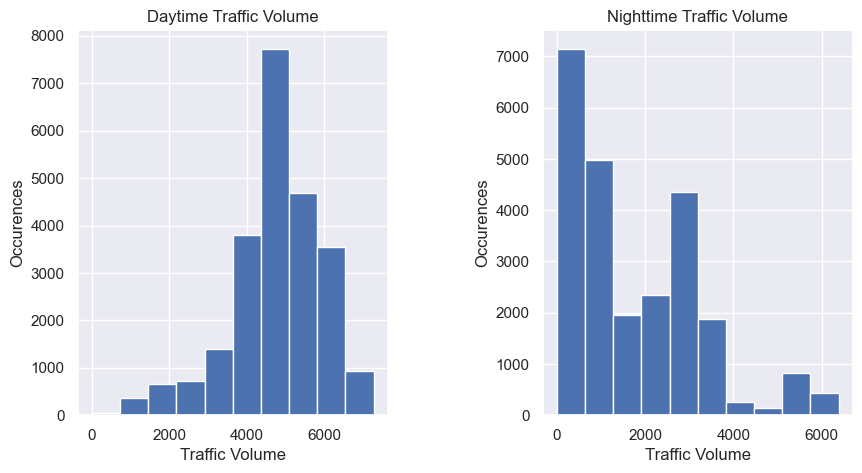

In [14]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Occurences')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Occurences')

plt.show()

* Looking at the two histograms, we can say that the traffic during the daytime is more when compared to the nighttime. 
* This is evident by the fact daytime traffic volume is left skewed, meaning the number of occurences is more towards the higher traffic volume.
* Whereas, the nighttime traffic volume is right skewed, when the traffic volume keeps increasing, the occurences of those particular volume decreases.

Now, an interesting question arises after looking at the histogram, since our goal is to find indicators of heavy traffic, and
the nighttime traffic is significantly less when compared to day time, should we still be using the entire dataset?

So, since, our goal is to find indicators for heavy traffic and day time traffic shows more volume, we will focus only on the day time of the dataset moving forward.

# Time Indicators

One of the point we made at the beginning was the fact that during different time of the day, or depending on a certain month (holiday season), traffic volume would vary. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at few line plots on how the traffic volume changes according to the following parameters:
* Month
* Day of the week
* Time of day

### Month

We'll calculate the average volume for each month and plot a line graph on how the traffic volume changed for each month on average.

In [15]:
daytime['month'] = daytime['date_time'].dt.month #extracts the month from the date_time in a new column
by_month = daytime.groupby('month').mean() #aggregates for each month, calculating the mean

by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

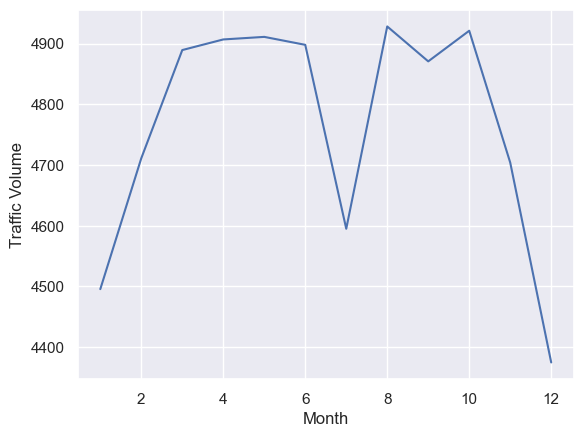

In [16]:
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

By looking at the line graph based on the average traffic volume for each month, **the traffic is usually heavier during warm months (March-October) compared to cold months (November-February).**

### Day of the week

We calculated the average traffic volume for each month, now similarly, we'll do it for the day of the week.

In [17]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_day_of_week = daytime.groupby('dayofweek').mean()

by_day_of_week['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

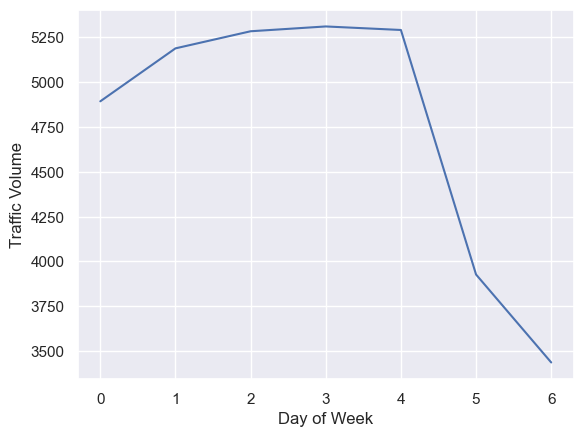

In [18]:
by_day_of_week['traffic_volume'].plot.line()
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.show()

The traffic volume increases during the starting days of the week (Monday - 0), and as the week progresses by to the weekend (Friday - 5), we can see a dip in the average traffic.

Makes sense that during the business days of the week, the average traffic volume is higher.

### Time of the day

Now, we'll generate a similar plot for the time of the day. Since, the weekends will drag down the average values. So, we'll look at the averages separately. 

To do that, we'll split the data based on the day type: **business day or weekend.**

In [19]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print('\n')
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


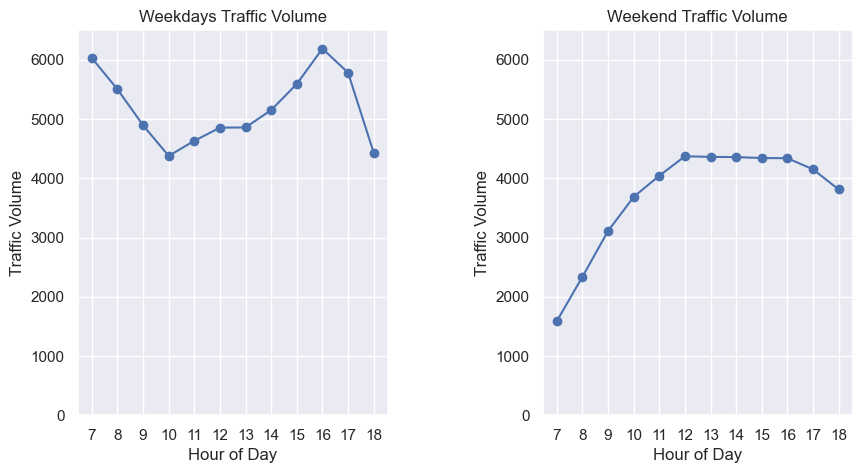

In [20]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=1)

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line(marker='o')
plt.xticks(range(7, 19))
plt.ylim([0, 6500])
plt.title('Weekdays Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line(marker='o')
plt.xticks(range(7, 19))
plt.ylim([0, 6500])
plt.title('Weekend Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')

plt.show()

* On the weekdays, the traffic volume starts off with 6000 at 7 am and gradually decreases over the next 3 hours, and as the day progresses, we can see a steady increase in the traffic volume and reaches more than 6000 at 16:00 hours.

* On the weekends, there's a stark contrast from the weekdays traffic volume. At 7 am, the traffic volume is somewhere close to near 1800. And as the hour increases, the traffic volume increases steadily. It's constant (about 4300) during the 12 pm to 4 pm.

* The traffic is usually heavier on business days compared to weekends.

# Weather Indicators

Another possible indicator of heavy traffic is weather. In our dataset, we have many columns which represents weather - `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these weather columns are numerical, so we can visualize the realtionship between these columns and the `traffic_volume` using correlation.

Let's begin by checking the columns which are numeric.

In [21]:
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  dayofweek            23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB


Apart from the `weather_main` and `weather_description` column which are string data type. Rest of the weather columns are numerical. 

So, we can correlate these columns to traffic_volume. Just a reminder, we'll still only work with the daytime data for the correlation, as well.

### Correaltion against traffic volume

We'll use a grid chart to analyse the comparison for 4 different columns against one column, since it'll help to ease the comparison. 

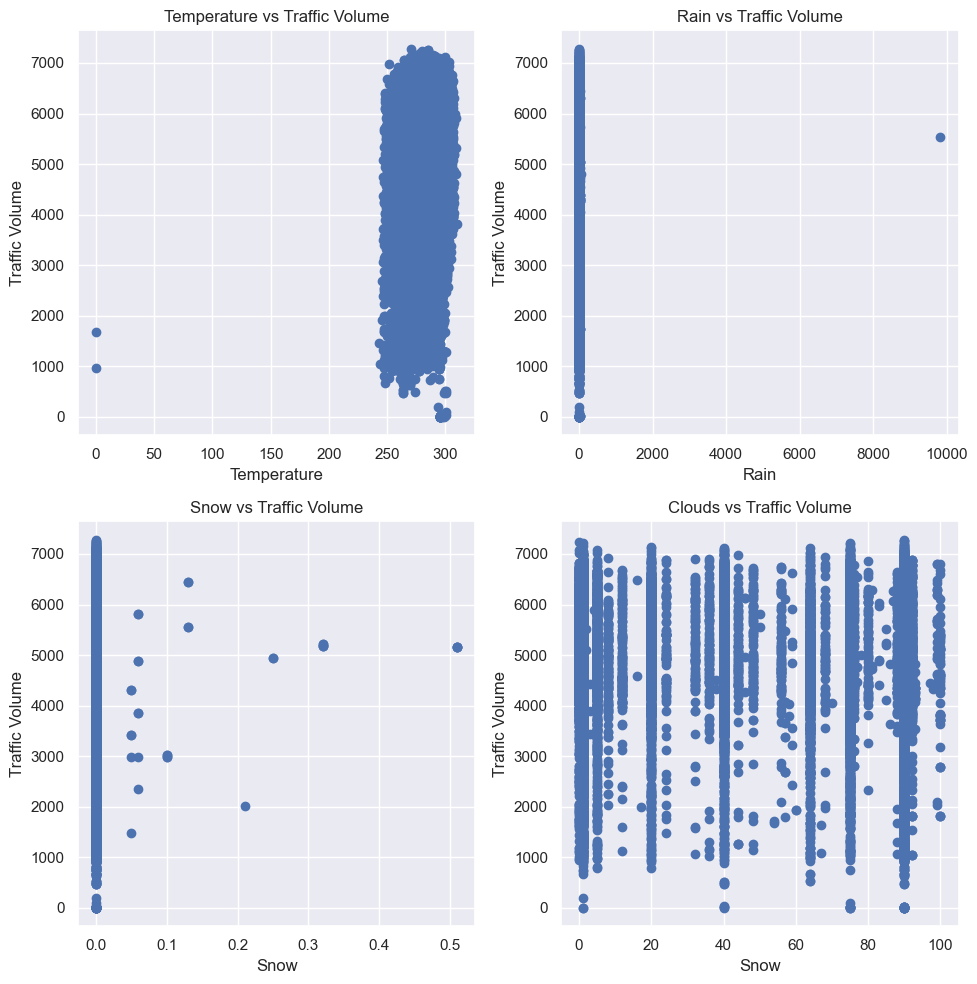

In [22]:
plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
plt.subplots_adjust(wspace=2, hspace=2)

plt.subplot(2, 2, 1)
plt.scatter(daytime['temp'], daytime['traffic_volume'])
plt.title('Temperature vs Traffic Volume')
plt.ylabel('Traffic Volume')
plt.xlabel('Temperature')

plt.subplot(2, 2, 2)
plt.scatter(daytime['rain_1h'], daytime['traffic_volume'])
plt.title('Rain vs Traffic Volume')
plt.ylabel('Traffic Volume')
plt.xlabel('Rain')

plt.subplot(2, 2, 3)
plt.scatter(daytime['snow_1h'], daytime['traffic_volume'])
plt.title('Snow vs Traffic Volume')
plt.ylabel('Traffic Volume')
plt.xlabel('Snow')

plt.subplot(2, 2, 4)
plt.scatter(daytime['clouds_all'], daytime['traffic_volume'])
plt.title('Clouds vs Traffic Volume')
plt.ylabel('Traffic Volume')
plt.xlabel('Snow')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


Looking at the charts, it's hard to establish if any column is correlated with the traffic volume. So, we can't say if any of the weather type contributes to the traffic indicator.


# Weather Types

Let's look at the next two columns related to weather, if we can uncover any sort of insights. The columns we're dealing with now is - `weather_main` and `weather_description`. Before, we create any kind of chart, let's look at what the columns values are.

In [23]:
daytime['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

In [24]:
daytime['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'proximity shower rain',
       'moderate rain', 'drizzle', 'heavy intensity rain', 'fog',
       'proximity thunderstorm', 'heavy snow', 'snow', 'freezing rain',
       'shower snow', 'light rain and snow',
       'light intensity shower rain', 'thunderstorm with heavy rain',
       'thunderstorm with rain', 'thunderstorm with light rain',
       'proximity thunderstorm with rain', 'heavy intensity drizzle',
       'Sky is Clear', 'very heavy rain',
       'proximity thunderstorm with drizzle', 'light snow',
       'thunderstorm with drizzle', 'thunderstorm', 'smoke', 'SQUALLS',
       'light shower snow', 'sleet', 'thunderstorm with light drizzle',
       'shower drizzle'], dtype=object)

After looking at the two columns, they are both closely related. The `weather_main` column tells the weather type and `weather_description` describes the weather found in the `weather_main` column.

So, we're going to calculate the average traffic volume associated with each unique value in these two columns.

In [25]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

We'll create a bar plot for the `traffic_volume` column of `by_weather_main` and `by_weather_description`.

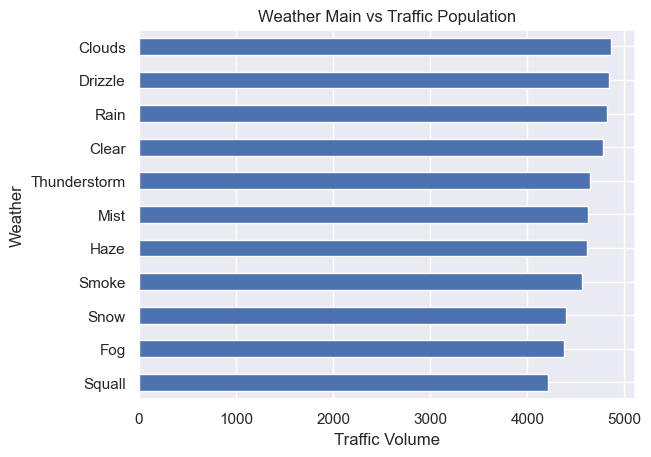

In [26]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.title('Weather Main vs Traffic Population')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

The weather main doesn't affect greatly on the traffic volume. Irrespective of the weather, the traffic volume is constantly above 4000 for all the weather types. 

There seems to be only a nominal amount of reduction in traffic volume on the events of fog or squall.

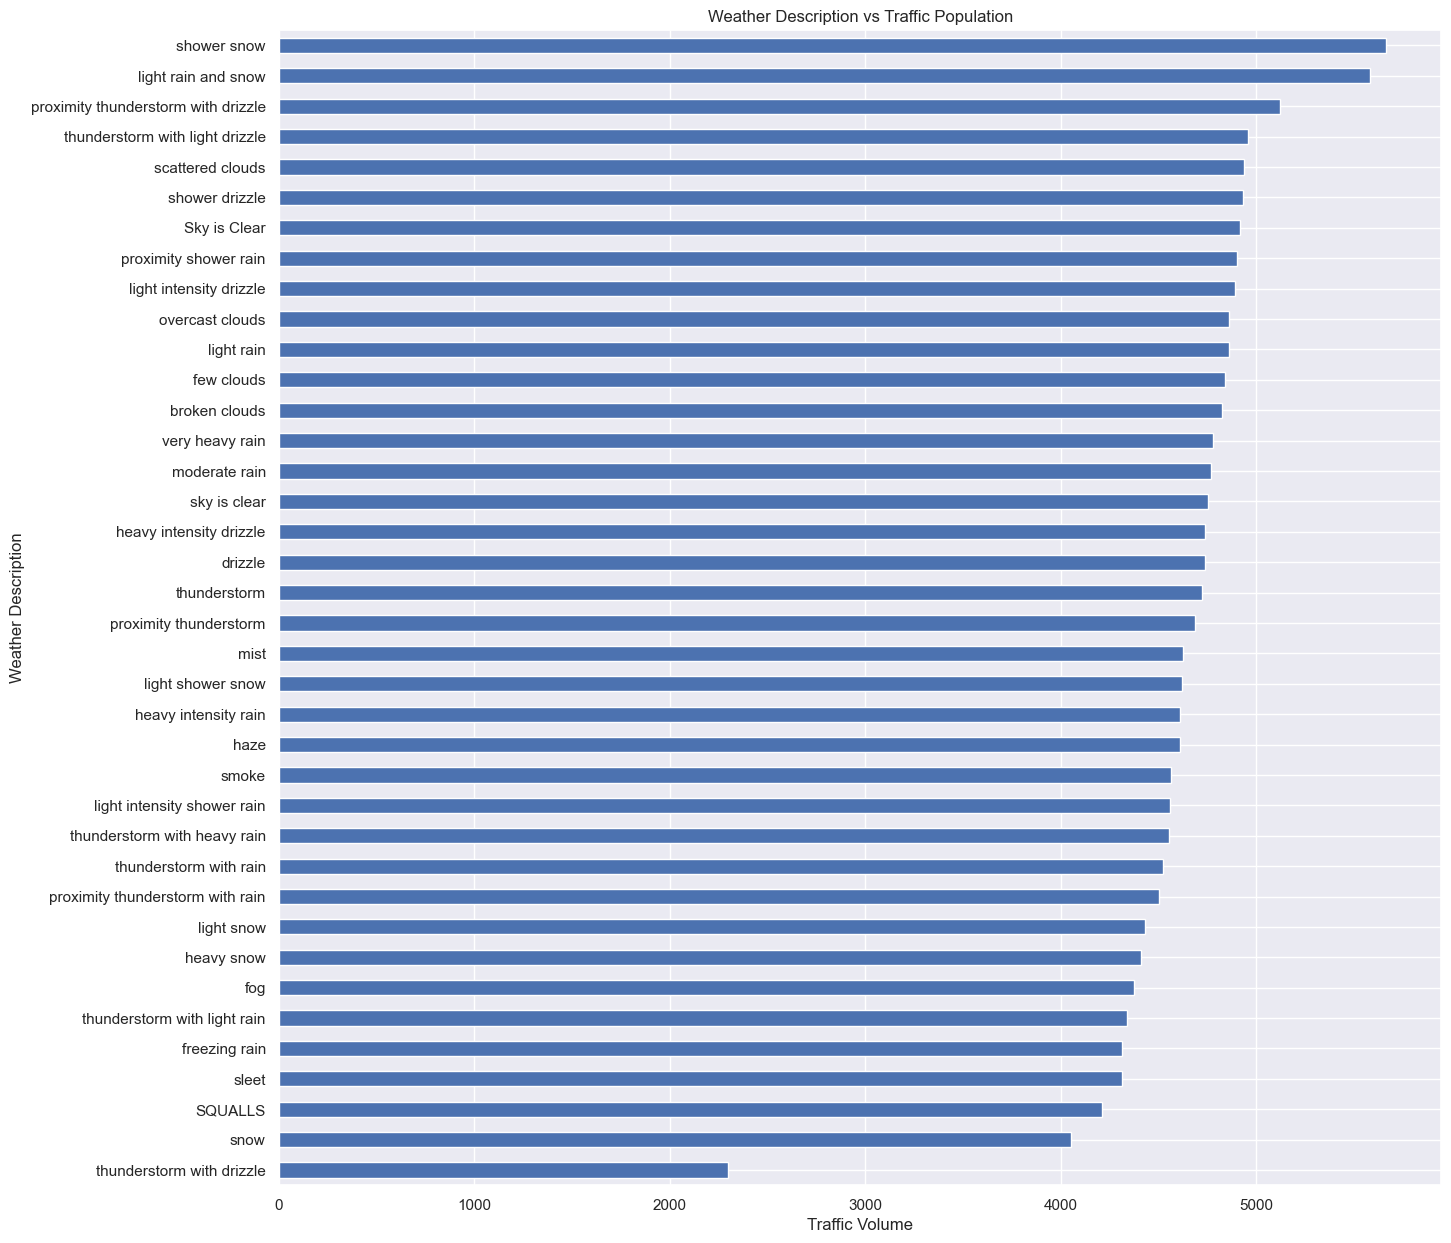

In [27]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(15, 15))
plt.title('Weather Description vs Traffic Population')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

Like we mentioned before, the two columns are closely related to one another. So, the frequency of the traffic volume is almost similar to the weather main chart. 

The stark difference being, when there is a thunderstom with drizzle, the traffic volume significantly reduces to almost half (about 2500).

# Conclusion

We analyzed so many columns to find out the traffic indicators on I-94 highway.

* **Majority of the traffic volume falls in the range of 2500-5000**. There are less number of days, when the traffic volume goes over 6000.
* The **traffic volume during the day time is more when compared to night time**.
* The **traffic is usually heavier during warm months (March-October) compared to cold months (November-February)**.
* When compared to the day of the week, the **traffic volume increases during the weekdays and falls significantly as it approaches weekend**.
* When compared to the hour of the day with respect to weekdays and weekend, the traffic volume varies. 
    * **During weekdays, the traffic volume increases in the morning, and drops down as it approaches the evening**.
    * **During weekends, the traffic is constant during the noon to the evening**.
* There is **no correlation between the traffic volume and the weather columns**. Only, on the event of thunderstorm with drizzle, there seems to be a decrease in the volume of traffic.
